In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
df_train.shape

(891, 12)

### 1. Предобработка данных

In [215]:
#Перераспределение целевого столбца в конец для удобства
df_train = df_train.reindex(columns=['PassengerId','Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'])
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [217]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [219]:
#Конвертация в строку, поскольку данный признак является категориальной
df_train['Pclass'] = df_train['Pclass'].apply(str)
df_test['Pclass'] = df_test['Pclass'].apply(str)

In [221]:
#Количество представителей каждого класса
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [223]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [225]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [227]:
df_train = df_train.set_index('PassengerId')
df_test = df_test.set_index('PassengerId')

In [229]:
df_nums = df_train.select_dtypes(exclude='object')

<Axes: >

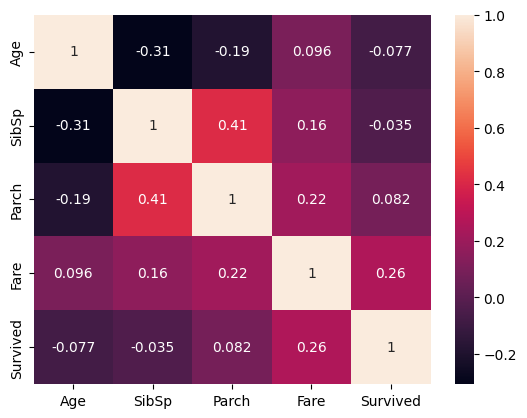

In [231]:
sns.heatmap(data = df_nums.corr(), annot = True)

In [233]:
#Поскольку столбцы sibsp и parch можно расценивать как родных людей, принято решение объединить данные столбцы.
df_train['Close_people'] = df_train['SibSp'] + df_train['Parch']
df_test['Close_people'] = df_test['SibSp'] + df_test['Parch']
df_train = df_train.drop(['SibSp', 'Parch'], axis=1)
df_test = df_test.drop(['SibSp', 'Parch'], axis=1)
df_train = df_train.reindex(columns = ['Pclass', 'Name', 'Sex', 'Age', 'Close_people', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'])
df_test = df_test.reindex(columns = ['Pclass', 'Name', 'Sex', 'Age', 'Close_people', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
df_train.head()

,Pclass,Name,Sex,Age,Close_people,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S,0


In [235]:
df_train['Ticket'].unique().size

681

In [237]:
#Поскольку столбец Cabin содержит 77% пропущенных значений, принято решение убрать данный столбец
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

In [239]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Survived', ylabel='Age'>

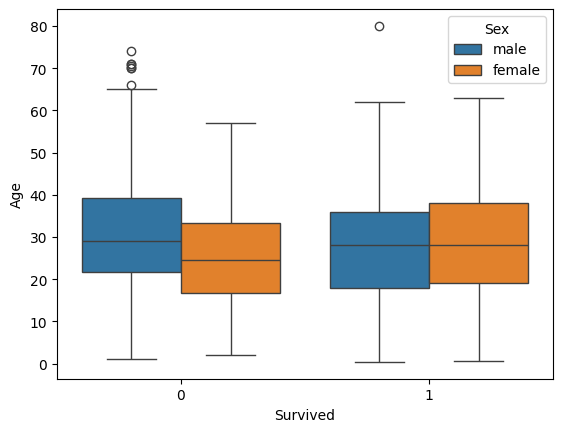

In [241]:
sns.boxplot(x='Survived', y='Age', data=df_train, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

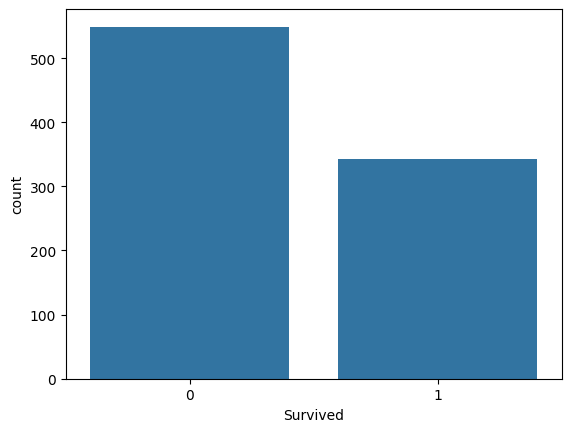

In [243]:
sns.countplot(df_train, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

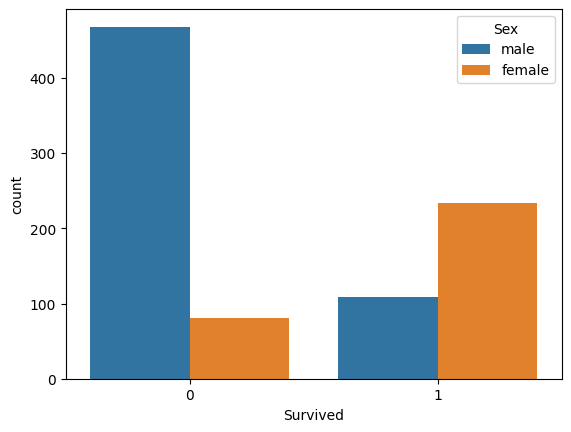

In [245]:
sns.countplot(df_train, x='Survived', hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

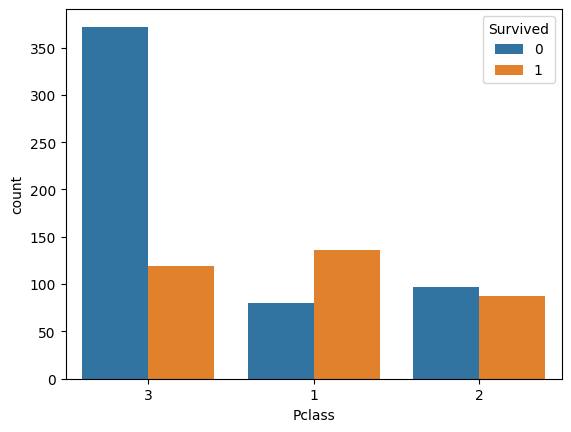

In [247]:
sns.countplot(df_train, x='Pclass', hue='Survived')

In [249]:
#Принято решение убрать столбец Ticket, поскольку для построения модели, на мой взгляд, будет достаточно иметь информацию
#о классе билета
df_train = df_train.drop('Ticket', axis=1)
df_test = df_test.drop('Ticket', axis=1)
df_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'Close_people', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

In [251]:
df_test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'Close_people', 'Fare', 'Embarked'], dtype='object')

In [253]:
#Принято решение вместо пропущенных значений в столбце Age вставить значение 29,5.
#Обоснование: среднее значение возраста равняется 29.69, поскольку в описании данных указано, что в некоторых строках
#содержатся оценочные возраста в формате xx.5, тогда для пропущенных значений также укажу оценочный возраст 29.5.
#Также было выбрано среднее значение возраста, потому что судя по boxplot и по коэффициенту корреляции выжимаемость/не выживаемость
#никак не связаны
df_train['Age'] = df_train['Age'].fillna(29.5)
df_train.isnull().sum()

Pclass          0
Name            0
Sex             0
Age             0
Close_people    0
Fare            0
Embarked        2
Survived        0
dtype: int64

In [255]:
df_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [257]:
#По тем же соображениям указываем среднее значение возраста для пропущенных ячеек
df_test['Age'] = df_test['Age'].fillna(30)
df_test.isnull().sum()

Pclass          0
Name            0
Sex             0
Age             0
Close_people    0
Fare            1
Embarked        0
dtype: int64

<Axes: xlabel='Fare'>

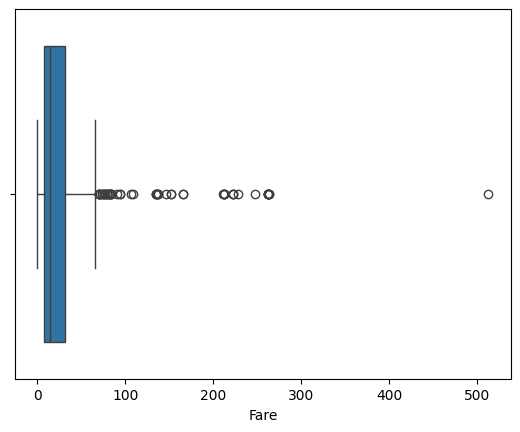

In [259]:
sns.boxplot(x='Fare', data=df_test)

<Axes: xlabel='Fare'>

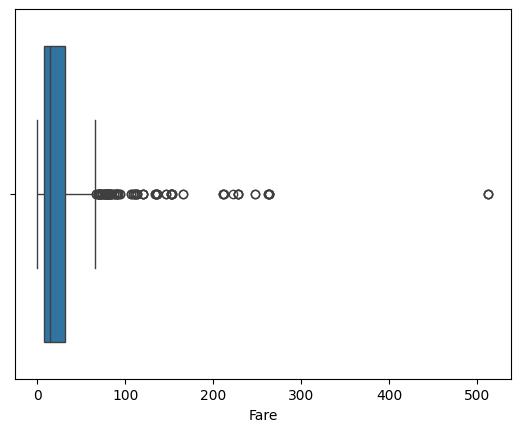

In [261]:
sns.boxplot(x='Fare', data=df_train)

In [263]:
#Разбираемся с Embarked
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [265]:
df_train[df_train['Embarked'].isnull()]

,Pclass,Name,Sex,Age,Close_people,Fare,Embarked,Survived
PassengerId,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,80.0,NaN,1
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,80.0,NaN,1


In [267]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train.isnull().sum()

Pclass          0
Name            0
Sex             0
Age             0
Close_people    0
Fare            0
Embarked        0
Survived        0
dtype: int64

<Axes: xlabel='Survived', ylabel='Fare'>

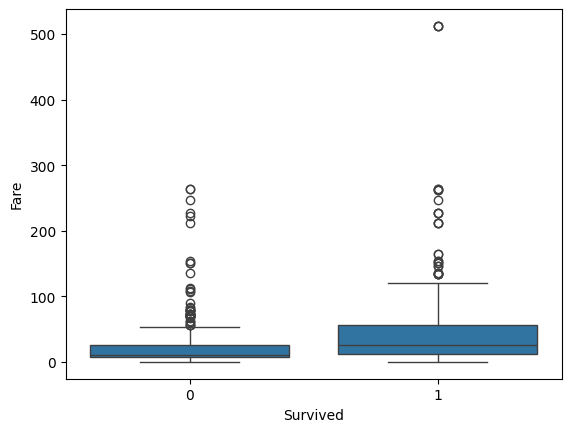

In [269]:
sns.boxplot(x='Survived', y='Fare', data=df_train)

<Axes: xlabel='Fare'>

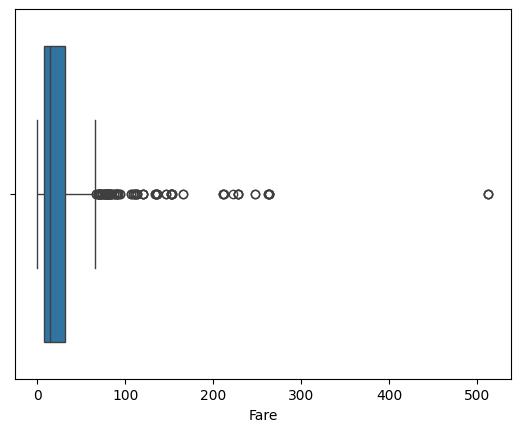

In [271]:
sns.boxplot(x='Fare', data=df_train)

In [273]:
#Удаляем столбец Name
df_train = df_train.drop('Name', axis=1)
df_test = df_test.drop('Name', axis=1)
df_train.columns

Index(['Pclass', 'Sex', 'Age', 'Close_people', 'Fare', 'Embarked', 'Survived'], dtype='object')

In [275]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'Close_people', 'Fare', 'Embarked'], dtype='object')

In [277]:
df_test.isnull().sum()

Pclass          0
Sex             0
Age             0
Close_people    0
Fare            1
Embarked        0
dtype: int64

In [279]:
df_test[df_test['Fare'].isnull()]

,Pclass,Sex,Age,Close_people,Fare,Embarked
PassengerId,,,,,,
1044,3,male,60.5,0,NaN,S


In [281]:
avg_fare_3 = np.round(df_test[df_test['Pclass']=='3']['Fare'].mean(), 2)
avg_fare_3

12.46

In [283]:
#Поскольку у данного пассажира 3-й тип билета, можем указать среднее значение стоимости проезда для данного типа билета
df_test['Fare'] = df_test['Fare'].fillna(avg_fare_3)
df_test.isnull().sum()

Pclass          0
Sex             0
Age             0
Close_people    0
Fare            0
Embarked        0
dtype: int64

In [285]:
#Сохранение значений столбца Survived в переменную y и удаление столбца Survived из df_train
y = df_train['Survived']
df_train = df_train.drop('Survived', axis=1)
df_train

,Pclass,Sex,Age,Close_people,Fare,Embarked
PassengerId,,,,,,
1,3,male,22.0,1,7.2500,S
2,1,female,38.0,1,71.2833,C
3,3,female,26.0,0,7.9250,S
4,1,female,35.0,1,53.1000,S
5,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...
887,2,male,27.0,0,13.0000,S
888,1,female,19.0,0,30.0000,S
889,3,female,29.5,3,23.4500,S


In [287]:
#Объединение тренировочного и тестового набора данных в один DataFrame для формирования dummy-переменных
df_final = pd.concat([df_train, df_test], axis=0)
df_final

,Pclass,Sex,Age,Close_people,Fare,Embarked
PassengerId,,,,,,
1,3,male,22.0,1,7.2500,S
2,1,female,38.0,1,71.2833,C
3,3,female,26.0,0,7.9250,S
4,1,female,35.0,1,53.1000,S
5,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...
1305,3,male,30.0,0,8.0500,S
1306,1,female,39.0,0,108.9000,C
1307,3,male,38.5,0,7.2500,S


In [289]:
#Отбор категориальных переменных
df_final.select_dtypes(include='object')

,Pclass,Sex,Embarked
PassengerId,,,
1,3,male,S
2,1,female,C
3,3,female,S
4,1,female,S
5,3,male,S
...,...,...,...
1305,3,male,S
1306,1,female,C
1307,3,male,S


In [291]:
#Сохранения столбцов с числовыми значениями и категориальные столбцы в переменную df_nums и df_objs соответственно
df_nums = df_final.select_dtypes(exclude='object')
df_objs = df_final.select_dtypes(include='object')

In [293]:
#Формирование dummy-переменных
df_objs = pd.get_dummies(df_objs,drop_first=True)
df_objs

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,
1,False,True,True,False,True
2,False,False,False,False,False
3,False,True,False,False,True
4,False,False,False,False,True
5,False,True,True,False,True
...,...,...,...,...,...
1305,False,True,True,False,True
1306,False,False,False,False,False
1307,False,True,True,False,True


In [295]:
#Объединение числовых и категориальных столбцов
final_df = pd.concat([df_nums,df_objs],axis=1)
final_df

,Age,Close_people,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,22.0,1,7.2500,False,True,True,False,True
2,38.0,1,71.2833,False,False,False,False,False
3,26.0,0,7.9250,False,True,False,False,True
4,35.0,1,53.1000,False,False,False,False,True
5,35.0,0,8.0500,False,True,True,False,True
...,...,...,...,...,...,...,...,...
1305,30.0,0,8.0500,False,True,True,False,True
1306,39.0,0,108.9000,False,False,False,False,False
1307,38.5,0,7.2500,False,True,True,False,True


In [297]:
#Разделение данных на тренировочные и тестовые выборки
final_df_train = final_df.iloc[0:891]
final_df_test = final_df.iloc[891:]

### 2. Обучение модели

### 1) Метод KNN

In [299]:
#Метод KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [301]:
X = final_df_train

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [305]:
from sklearn.neighbors import KNeighborsClassifier

In [307]:
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
scaler = StandardScaler()

In [138]:
knn = KNeighborsClassifier()

In [142]:
#Операция выполнения стандартизации и вызов модели
operations = [('scaler', scaler), ('knn', knn)]

In [144]:
from sklearn.pipeline import Pipeline

In [146]:
#Вызываем объект Pipeline для выполнения обычных последовательных действий
pipe = Pipeline(operations)

In [148]:
from sklearn.model_selection import GridSearchCV

In [150]:
#Диапазон количества соседей
k_values = list(range(1,20))

In [152]:
param_grid = {'knn__n_neighbors':k_values}

In [154]:
#Применение GridSearch для нахождения оптимального параметра k
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [156]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [158]:
#Вывод оптимальных параметров модели. Видим, что оптимальное k=6
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=6))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=6),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 6,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [160]:
#Предсказание на тестовом наборе данных
full_pred = full_cv_classifier.predict(X_test)

In [162]:
#Вывод результатов значений метрик классификации
#Accuracy составила 0.78
#Precision для класса 0 и 1 имеют примерно одинаковое значение
#А вот Recall кординально отличается 0.88 для класса 0, 0.64 для класса1
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       105
           1       0.78      0.64      0.70        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179



In [164]:
final_pred = full_cv_classifier.predict(final_df_test)

In [309]:
id = np.array(df_test.index)

In [170]:
#Сохранение результатов предсказанных значений в DataFrame
df1 = {'PassengerId': id, 'Survived': final_pred}
df_result = pd.DataFrame(df1)
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [172]:
#Сохранение резульатов в csv-file для отправки в kaggle
df_result.to_csv('sample_submission.csv', index=False)

### 2) Логистическая регрессия

In [311]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [313]:
from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV()

In [315]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [317]:
#Вывод коэффициентов логистической регрессии
log_model.coef_

array([[-0.08467691, -0.05988978,  0.16944934,  0.05120021, -0.2638124 ,
        -0.53203719, -0.00856731, -0.11456948]])

In [319]:
y_pred = log_model.predict(scaled_X_test)

In [321]:
#По сравнению с KNN все значения метрик, кроме Recall для класса 1 повысились
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       105
           1       0.87      0.64      0.73        74

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179



In [323]:
scaled_final_df_test = scaler.transform(final_df_test)
final_pred_log = log_model.predict(scaled_final_df_test)

In [325]:
#Сохранение результатов предсказанных значений в DataFrame
df_log = {'PassengerId': id, 'Survived': final_pred_log}
df_result_log = pd.DataFrame(df_log)

In [327]:
#Сохранение резульатов в csv-file для отправки в kaggle
df_result_log.to_csv('sample_submission.csv', index=False)

### После отправки данного csv файла в kaggle, получил точность 0.77511 для логистической регрессии и KNN